Paridhi Bhardwaj
Assignment 3


In [ ]:
#env setup
# Install PyTorch and Torchvision
!pip install torch torchvision

# Import required libraries
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from PIL import Image
import torchvision
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights


In [ ]:
# Load the pre-trained Faster-RCNN model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)
model.eval()  # Set the model to evaluation mode

# Define the COCO class labels
COCO_CLASSES = weights.meta["categories"]
print("COCO Classes:", COCO_CLASSES)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 121MB/s]


COCO Classes: ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving football_match.mp4 to football_match.mp4


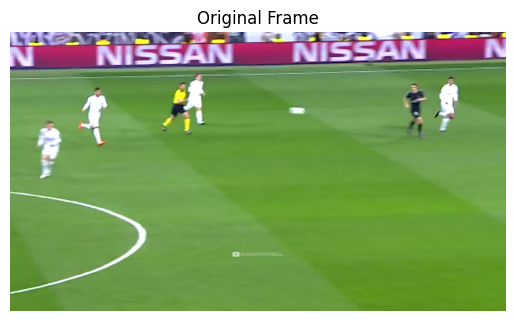

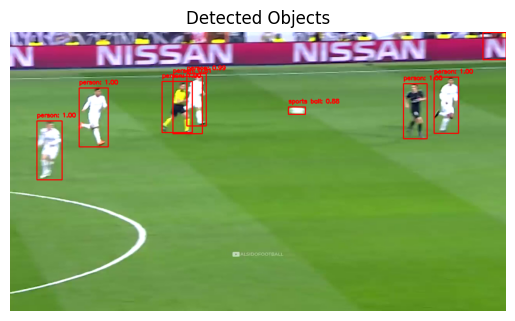

In [ ]:
# Step 3: Set the video path to the uploaded file
video_path = list(uploaded.keys())[0]  # Use the name of the uploaded file

cap = cv2.VideoCapture(video_path)

# Function to process a single frame
def process_frame(frame):
    # Convert BGR (OpenCV) to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Convert to PIL Image
    pil_image = Image.fromarray(frame_rgb)
    # Transform to tensor
    tensor_image = F.to_tensor(pil_image)
    return tensor_image, pil_image

# Read the first frame for demonstration
ret, frame = cap.read()
if ret:
    frame_tensor, frame_pil = process_frame(frame)
    plt.imshow(frame_pil)
    plt.title("Original Frame")
    plt.axis("off")
    plt.show()


# Perform object detection on the first frame
with torch.no_grad():
    detections = model([frame_tensor])

# Visualize the results
def draw_boxes(image, detections, threshold=0.5):
    # Convert tensor to numpy
    image = np.array(image)
    for i, box in enumerate(detections[0]["boxes"]):
        score = detections[0]["scores"][i].item()
        label = COCO_CLASSES[detections[0]["labels"][i].item()]
        if score > threshold:
            # Draw bounding box
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            # Add label and score
            text = f"{label}: {score:.2f}"
            cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return image

# Draw and display the results
result_image = draw_boxes(frame_pil, detections)
plt.imshow(result_image)
plt.title("Detected Objects")
plt.axis("off")
plt.show()


In [ ]:
# Define the output video writer
output_path = "output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, cap.get(cv2.CAP_PROP_FPS),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Process each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_tensor, frame_pil = process_frame(frame)
    with torch.no_grad():
        detections = model([frame_tensor])
    result_frame = draw_boxes(frame_pil, detections)
    # Convert RGB to BGR for OpenCV
    result_frame = cv2.cvtColor(np.array(result_frame), cv2.COLOR_RGB2BGR)
    out.write(result_frame)

cap.release()
out.release()
print("Processed video saved to", output_path)


Processed video saved to output_video.mp4
